In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define SGD Function
def delta_sgd(W, X, D, learning_rate):
    for k in range(len(X)):       # Loop through all samples
        x = X[k].reshape(-1, 1)   # Reshape input sample to a column vector
        d = D[k]                  # Prediction (Desired output) for sample k
        v = np.dot(W, x)          # Weighted sum
        y = sigmoid(v)            # Output after activation
        e = d - y                 # Error
        delta = e * y * (1 - y)   # Gradient of error w.r.t. weights
        W += learning_rate * delta * x.T # Accumulate weights for all samples
    return W

# Define the Batch Function for Batch Gradient Descent
def delta_batch(W, X, D, learning_rate):
    dWsum = np.zeros_like(W) # Initialize the gradient sum
    for k in range(len(X)):
        x = X[k].reshape(-1, 1)
        d = D[k]
        v = np.dot(W, x)
        y = sigmoid(v)
        e = d - y
        delta = e * y * (1 - y)
        dWsum += learning_rate * delta * x.T
    dWavg = dWsum / len(X)   # Average the gradients
    W = W + dWavg            # Update weights using the averaged gradient
    return W

# Define Training Function
def run_training(W1, W2, X, D, epochs, lr):
    E1 = np.zeros(epochs)
    E2 = np.zeros(epochs)
    for epoch in range(epochs):
        W1 = delta_sgd(W1, X, D, lr)
        W2 = delta_batch(W2, X, D, lr)
        es1 = 0
        es2 = 0
        for k in range(len(X)):
            x = X[k].reshape(-1, 1)
            d = D[k]
            v1 = np.dot(W1, x)
            v2 = np.dot(W2, x)
            y1 = sigmoid(v1)
            y2 = sigmoid(v2)
            es1 += (d - y1) ** 2
            es2 += (d - y2) ** 2
        E1[epoch] = np.squeeze(es1) / len(X)
        E2[epoch] = np.squeeze(es2) / len(X)
    return E1, E2

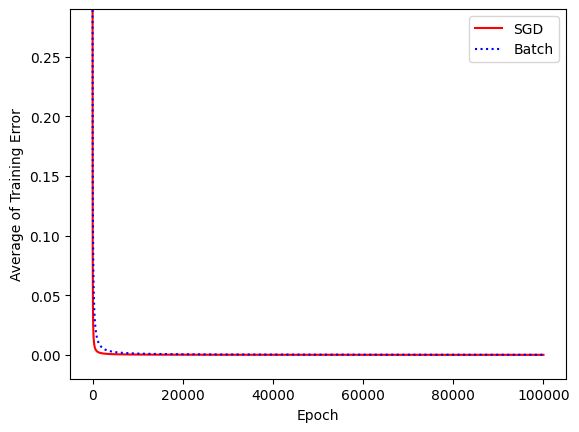

In [18]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[0.68, 0.01, 0.73]] # [[3332322.1, -323256.6, 772213.0]]
W2 = W1

# Parameters
epochs = 100000
lr = 0.9 # learning rate

# Train data
E1, E2 = run_training(W1, W2, X, D, epochs, lr)

# Visualize
plt.plot(E1, 'r', label='SGD')
plt.plot(E2, 'b:', label='Batch')
plt.xlabel('Epoch')
plt.ylabel('Average of Training Error')
plt.legend()
plt.ylim(-0.02,0.29)
plt.show()